# **Author details**


*   Author : poojith routhu
*   Net Id: pgr18001
*   Student Id: 2668842
*   Email Id: poojith.routhu@uconn.edu
*   Assignment 01

*  Date :04-Feb-2019 




# **About Data**
 We are using two awesome datasets for this assignment - US county-level census estimates from 2015 (American Community Survey) and summarized/aggregated data for the VIIRS satellite which takes a picture of the Earth every night at ~1:30 AM local time. For each county, I fit a function to calculate the percentiles of nighttime light (NTL) brightness per county. 
 
Background on county-level estimate data - your target variable is POPESTIMATE2015 (county-level population estimate from 2015) https://www.census.gov/programs-surveys/acs/ 
 
Background on VIIRS NTL data from July 2015 - you should use all columns starting with “Q” like Q0, Q25, Q50 etc. https://ncc.nesdis.noaa.gov/VIIRS/  

# **Importing libraries**

In [0]:
#importing pandas as part of handling the dataframe
import pandas as pd

#used to read excel filess
from pandas import read_excel

# importing numpy : used for array,matrix and other data types
import numpy as np

# importing scikit
# importing sklearn used for datasets and linear model building
# this library contains all machine learning models
from sklearn import datasets, linear_model

# importing the metrics
from sklearn.metrics import mean_squared_error, r2_score

# importing matplotlib for ploting the graph
import matplotlib.pyplot as plt

# importing random
import random

#setting random to 123 so that randomness won't change through out model
# even if we run once again
random.seed(123)

#importing metrics to calculate AUC
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# **Loading data**
loading the dataset from google drive
```




In [0]:
#uploading files to google co lab
#from google.colab import files
#uploaded = files.upload()
#df = pd.read_excel("DL HW 1_data.xlsx")

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')
#ls

sharable link for the data:
https://drive.google.com/open?id=1Q2s0-FLLgxLavQNaJPwz-mUFycvuo95n


id = 1Q2s0-FLLgxLavQNaJPwz-mUFycvuo95n




In [0]:
url = "https://drive.google.com/uc?export=download&id=1Q2s0-FLLgxLavQNaJPwz-mUFycvuo95n"

df = read_excel(url)
df.head()

,Month,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,STNAME,CTYNAME,POPESTIMATE2015
0,JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00000,0.0000,0.000000,Maryland,Allegany,72498
1,JUL,0.02,0.08,0.09,0.11,0.13,0.18,0.30,0.72,1.89,4.110,10.37625,18.9790,95.500000,Alabama,Russell,58847
2,JUL,0.10,0.15,0.16,0.18,0.20,0.23,0.30,0.46,0.82,1.363,3.11650,7.0808,42.669998,Georgia,Meriwether,21186
3,JUL,-0.04,0.03,0.04,0.05,0.07,0.12,0.21,0.47,0.92,1.500,2.93425,8.3137,203.500000,Louisiana,Cameron Parish,6815
4,JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00000,0.0000,0.000000,Iowa,Clarke,9227


# **Data Exploring**

In [0]:
df.describe()

,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,POPESTIMATE2015
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03
mean,-0.002188,0.038799,0.053699,0.070809,0.097120,0.174372,0.351830,0.783197,1.777998,2.982530,4.716755,8.087240,39.663584,1.058292e+05
std,0.141941,0.171293,0.230851,0.304831,0.425011,0.825364,1.685318,3.355028,6.304048,8.998663,12.084223,17.355886,98.100495,3.532298e+05
min,-0.580000,-0.280000,-0.180000,-0.120000,-0.070000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.800000e+01
25%,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.088100e+04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.165000,0.585000,2.575600e+04
75%,0.000000,0.030000,0.050000,0.070000,0.090000,0.140000,0.230000,0.420000,0.860000,1.583250,3.291500,8.595625,50.370000,7.043000e+04
max,2.610000,2.773600,6.000000,7.636000,10.530000,17.709999,32.000000,50.889999,74.743997,97.989998,122.191002,191.830002,2209.040039,1.012325e+07


# **Data Preprocessing**

*  remove negative values
*  check about zero values
*  check about other columns

In [0]:
# replacing the negative values with zero

num = df._get_numeric_data()
num[num<0] = 0
df.describe()

,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,POPESTIMATE2015
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03
mean,0.021708,0.043215,0.056080,0.071960,0.097440,0.174384,0.351830,0.783197,1.777998,2.982530,4.716755,8.087240,39.663584,1.058292e+05
std,0.123059,0.169017,0.229919,0.304463,0.424925,0.825361,1.685318,3.355028,6.304048,8.998663,12.084223,17.355886,98.100495,3.532298e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.800000e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.088100e+04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.165000,0.585000,2.575600e+04
75%,0.000000,0.030000,0.050000,0.070000,0.090000,0.140000,0.230000,0.420000,0.860000,1.583250,3.291500,8.595625,50.370000,7.043000e+04
max,2.610000,2.773600,6.000000,7.636000,10.530000,17.709999,32.000000,50.889999,74.743997,97.989998,122.191002,191.830002,2209.040039,1.012325e+07


## **Understanding the data** 
why some rows have all zero values 
find there significance

In [0]:
df[(df['Q10']==0) & (df['Q5']==0)].shape
u_df=df.copy()
u_df['POPESTIMATE2015']=0
u_df['e'] = u_df.sum(axis=1)
u_df.head()

,Month,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,STNAME,CTYNAME,POPESTIMATE2015,e
0,JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00000,0.0000,0.000000,Maryland,Allegany,0,0.000000
1,JUL,0.02,0.08,0.09,0.11,0.13,0.18,0.30,0.72,1.89,4.110,10.37625,18.9790,95.500000,Alabama,Russell,0,132.485250
2,JUL,0.10,0.15,0.16,0.18,0.20,0.23,0.30,0.46,0.82,1.363,3.11650,7.0808,42.669998,Georgia,Meriwether,0,56.830298
3,JUL,0.00,0.03,0.04,0.05,0.07,0.12,0.21,0.47,0.92,1.500,2.93425,8.3137,203.500000,Louisiana,Cameron Parish,0,218.157950
4,JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00000,0.0000,0.000000,Iowa,Clarke,0,0.000000


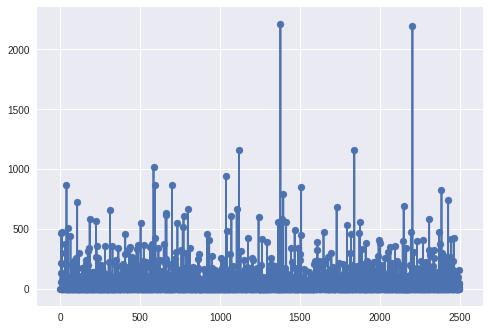

In [0]:
x=u_df[u_df['e']==0].shape[0]

plt.plot(u_df['e'])
plt.scatter(range(u_df.shape[0]),u_df['e'])


Main data frame contains 2500 observations out of which 1242 rows contains all of them as zero
which means that half of the observations contains zeros

In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive')
from google.colab import files
fil=u_df.to_csv(index=False)
#files.download(fil)

## ** Tableau Insights**

*  Image files for states where Q0 to Q100 is zero 
*  plotted in Tableau: check image on below link
*  https://drive.google.com/file/d/1iHZJ11hYHn-79Jry2JPvZ3murPGpxiZ3/view?usp=sharing
*  general view of whole data
*  https://drive.google.com/file/d/1YkMrniL5Qwkd717QRP0sDHiMVGhpOKWE/view?usp=sharing





# **Create Training And Test Data**

In [0]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.

df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# view top 5 rows
df.head()

,Month,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,STNAME,CTYNAME,POPESTIMATE2015,is_train
0,JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00000,0.0000,0.000000,Maryland,Allegany,72498,False
1,JUL,0.02,0.08,0.09,0.11,0.13,0.18,0.30,0.72,1.89,4.110,10.37625,18.9790,95.500000,Alabama,Russell,58847,True
2,JUL,0.10,0.15,0.16,0.18,0.20,0.23,0.30,0.46,0.82,1.363,3.11650,7.0808,42.669998,Georgia,Meriwether,21186,True
3,JUL,0.00,0.03,0.04,0.05,0.07,0.12,0.21,0.47,0.92,1.500,2.93425,8.3137,203.500000,Louisiana,Cameron Parish,6815,True
4,JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00000,0.0000,0.000000,Iowa,Clarke,9227,True


In [0]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [0]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 1875
Number of observations in the test data: 625


In [0]:
#assigning the x and y columns for modeling

x_train = train.iloc[:,1:16]

y_train = train['POPESTIMATE2015']

x_test = test.iloc[:,1:16]

y_test = test['POPESTIMATE2015']

# **Creating Results df** 

dataframe for storing results of all models

In [0]:
d={'Model':['Linear','Random','GBM'],'Test_MAPE':[652.42,572.21,609.77],'Test_MAE':[108995.995,106748.61,102956.35],'Train_MAPE':[652.42,572.21,609.77],'Train_MAE':[108995.995,106748.61,102956.35]}
results_model=pd.DataFrame(data=d)
results_model

,Model,Test_MAE,Test_MAPE,Train_MAE,Train_MAPE
0,Linear,108995.995,652.42,108995.995,652.42
1,Random,106748.610,572.21,106748.610,572.21
2,GBM,102956.350,609.77,102956.350,609.77


# **linear regression model**

In [0]:
#create linear regression object
regr = linear_model.LinearRegression()


In [0]:
# train the model using the training sets
regr.fit(x_train.iloc[:,0:13],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# making predictions on test dataset

y_pred = regr.predict(x_test.iloc[:,0:13])


In [0]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-3.82111429e+05 -1.65199533e+05  4.47447221e+05 -1.12988839e+06
  7.34854442e+05 -1.74062521e+05 -2.59256642e+04 -1.19256450e+03
  6.98129987e+04 -4.61576087e+03 -6.44081976e+03 -1.15933134e+03
  1.81548712e+02]
Mean squared error: 56754953802.49
Variance score: 0.06


## **results graph**

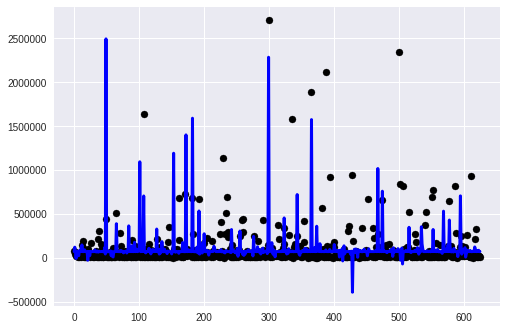

In [0]:
# Plot outputs
myList=[i for i in range(y_test.size)]
plt.scatter(myList,y_test,color='black')
plt.plot(myList,y_pred,color = 'blue',linewidth=3)

*  linear model has lot of negative predictions 
*  blue plot represents the predicted values
*  black represents true values of population

## **Calculating Parameters linear regression model**

Test data Mean Absolute Percent error: 546.2211847386468
Test data Mean Absolute error: 102834.56539706899
Train data Mean Absolute Percent error: 748.4151089662262
Train data Mean Absolute error: 108636.32362176002


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x7f1707e04b70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1707db2400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1707db2e80>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1707db2b00>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1707e04cf8>,
  <matplotlib.lines.Line2D at 0x7f1707dcf240>]}

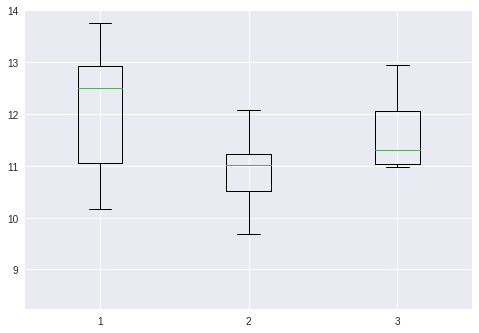

In [0]:
#error for validation set
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Test data Mean Absolute Percent error: "+ str(MAPE))

MAE = np.mean(np.abs(y_test - y_pred))
print("Test data Mean Absolute error: "+ str(MAE))

results_model.loc[0,'Test_MAPE']=MAPE
results_model.loc[0,'Test_MAE']=MAE

t_pred=regr.predict(x_train.iloc[:,0:13])
#error for training set 
MAPE = np.mean(np.abs((y_train - t_pred) / y_train)) * 100
print("Train data Mean Absolute Percent error: "+ str(MAPE))
results_model.loc[0,'Train_MAPE']=MAPE
MAE = np.mean(np.abs(y_train - t_pred))
print("Train data Mean Absolute error: "+ str(MAE))
results_model.loc[0,'Train_MAE']=MAE


AE = np.abs(y_test - y_pred)

nf_df = x_test
nf_df['AE']=AE
CA=nf_df[nf_df['STNAME']=='California']['AE']
TX=nf_df[nf_df['STNAME']=='Texas']['AE']
FL=nf_df[nf_df['STNAME']=='Florida']['AE']

data = [np.log(CA),np.log(TX),np.log(FL)]
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)


**Inferences from box plots**

1.   for california we had very big variance in absolute error
2.   Texas has got very less variation in the absolute error.
3.   Florida has same error mean as Texas but this has more variance AE.
4.   Overall California has high amount of error with more variation



## **Box plot**

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x7f170d9fb828>,
 'caps': [<matplotlib.lines.Line2D at 0x7f17123ab630>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f170d9fd9b0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f170d9fd438>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f170d9fba20>,
  <matplotlib.lines.Line2D at 0x7f170da719e8>]}

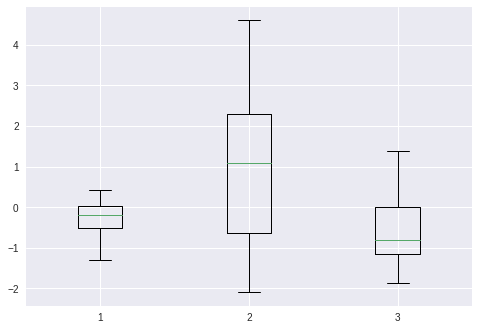

In [0]:
APE = np.abs((y_test - y_pred)/y_test)
#plt.boxplot(APE)
APE_log = np.log(APE)
#plt.boxplot(APE_log)

nf_df = x_test
nf_df['APE']=APE
CA=nf_df[nf_df['STNAME']=='California']['APE']
TX=nf_df[nf_df['STNAME']=='Texas']['APE']
FL=nf_df[nf_df['STNAME']=='Florida']['APE']

data = [np.log(CA),np.log(TX),np.log(FL)]
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)

**Insights from box plots**



1.   APE of california has got very less variation and it is near to zero
2.   APE of Texas has very high variation and it has positive value.
3.   Florida has negative MAPE and it has high variation.




## **50 worst predictions for linear regression model**

In [0]:
# 50 worst predicted countries in the US from linear regression
AE_d= np.abs(y_pred-y_test)
x_test_error = test.iloc[:,2:17]
x_test_error['pop_pred']=y_pred
x_test_error['AE']=AE_d

#soritng based upon the absolute error
x_sort=x_test_error.sort_values(['AE'], ascending=[False])

# getting top 50 rows 
pred_50=x_sort.head(50)
pred_50

,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,STNAME,CTYNAME,POPESTIMATE2015,pop_pred,AE
1997,0.0000,0.00000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,New York,Queens,2346005,6.929155e+04,2.276713e+06
223,0.1000,0.12000,0.140,0.170,0.260000,0.780000,6.690000,50.810001,73.107999,91.484001,122.629597,220.770004,Louisiana,Jefferson Parish,436888,2.495253e+06,2.058365e+06
1547,0.0000,0.00000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Washington,King,2117696,6.929155e+04,2.048404e+06
1368,0.0000,0.00000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Massachusetts,Middlesex,1584914,6.929155e+04,1.515622e+06
718,0.0000,0.00000,0.000,1.551,3.335000,6.910000,12.295000,21.170000,35.347500,46.319249,54.327001,66.930000,Virginia,Danville city,41910,1.400363e+06,1.358453e+06
659,1.0685,1.16000,1.200,2.670,9.490000,20.160000,36.090000,56.754999,76.459999,110.870002,133.704006,179.309998,Virginia,Portsmouth city,96241,1.191112e+06,1.094871e+06
960,0.0000,0.00000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Virginia,Fairfax,1142197,6.929155e+04,1.072905e+06
456,0.0000,0.84675,1.130,1.680,3.560000,7.770000,17.910000,28.719999,35.629001,41.101500,49.415300,62.209999,Virginia,Lynchburg city,79146,1.093338e+06,1.014192e+06
477,0.0000,0.00000,0.000,0.000,0.160000,0.460000,1.580000,17.099999,32.929999,49.732502,64.780502,163.779999,California,Alameda,1637141,7.037506e+05,9.333904e+05
766,0.4200,0.50000,0.600,0.820,1.440000,5.855000,18.197499,38.441000,53.197500,65.848750,89.335599,241.610001,Tennessee,Davidson,681285,1.590556e+06,9.092708e+05


# **Random forest model** 

In [0]:
#importing randomforest regression 
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(x_train.iloc[:,0:13], y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred_forest=regressor.predict(x_test.iloc[:,0:13])

In [0]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_forest))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred_forest))

Mean squared error: 114197207838.94
Variance score: -0.90


## **results graph**

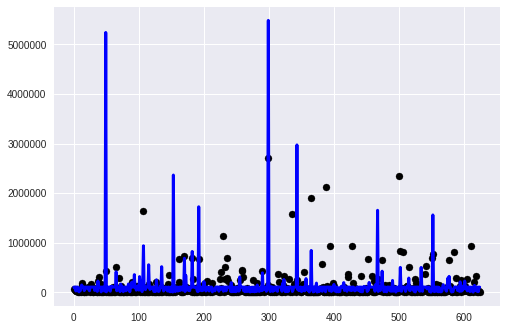

In [0]:
# Plot outputs
myList=[i for i in range(y_test.size)]
plt.scatter(myList,y_test,color='black')
plt.plot(myList,y_pred_forest,color = 'blue',linewidth=3)

*  we don't have any negative values in prediction.
*  this model has more performed well than the linear model.

## **Calculating Parameters for random model**

Test data Mean Absolute Percent error: 529.4822298712313
Test data Mean Absolute error: 110529.43819830833
Train data Mean Absolute Percent error: 1251.19701501716
Train data Mean Absolute error: 78278.72789973248


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x7f170df685c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f170df68e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f170df728d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f170df72550>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f170df68748>,
  <matplotlib.lines.Line2D at 0x7f170df04c50>]}

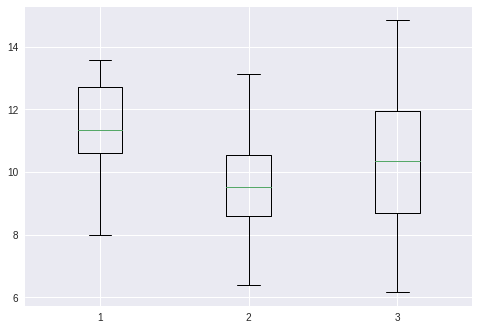

In [0]:
MAPE = np.mean(np.abs((y_test - y_pred_forest) / y_test)) * 100
print("Test data Mean Absolute Percent error: "+ str(MAPE))

MAE = np.mean(np.abs(y_test - y_pred_forest))
print("Test data Mean Absolute error: "+ str(MAE))

results_model.loc[1,'Test_MAPE']=MAPE
results_model.loc[1,'Test_MAE']=MAE


t_pred=regressor.predict(x_train.iloc[:,0:13])
#error for training set 
MAPE = np.mean(np.abs((y_train - t_pred) / y_train)) * 100
print("Train data Mean Absolute Percent error: "+ str(MAPE))
results_model.loc[1,'Train_MAPE']=MAPE
MAE = np.mean(np.abs(y_train - t_pred))
print("Train data Mean Absolute error: "+ str(MAE))
results_model.loc[1,'Train_MAE']=MAE

AE = np.abs(y_test - y_pred_forest)
AE_log = np.log(AE)
#plt.boxplot(AE_log)

nf_df = x_test
nf_df['AE']=AE
CA=nf_df[nf_df['STNAME']=='California']['AE']
TX=nf_df[nf_df['STNAME']=='Texas']['AE']
FL=nf_df[nf_df['STNAME']=='Florida']['AE']

data = [np.log(CA),np.log(TX),np.log(FL)]
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)

 **Inferences from box plot**
 
 *  california has high MAE compared to other two states.
 *  Again Texas and Florida has almost same MAE.
 *  Texas has got lot of variation compared to all states.

## **Box plot**

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x7f170dee6160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f170dee69b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f170def0470>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f170def00f0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f170dee62e8>,
  <matplotlib.lines.Line2D at 0x7f170de847f0>]}

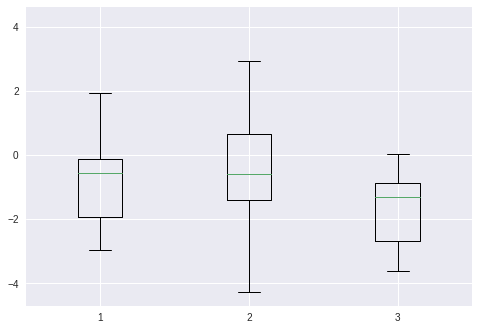

In [0]:
APE = np.abs((y_test - y_pred_forest)/y_test)
#plt.boxplot(APE)
APE_log = np.log(APE)
#plt.boxplot(APE_log)
nf_df = x_test
nf_df['APE']=APE
CA=nf_df[nf_df['STNAME']=='California']['APE']
TX=nf_df[nf_df['STNAME']=='Texas']['APE']
FL=nf_df[nf_df['STNAME']=='Florida']['APE']

data = [np.log(CA),np.log(TX),np.log(FL)]
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)

**Inferences from box plot**

*  MAPE for california, texas is almost zero but texas has got lot of variation.
*  MAPE for florida has been negative and it has less variation.

## **50 worst predictions random forest model**

In [0]:
# 50 worst predicted countries in the US from linear regression
AE_d= np.abs(y_pred_forest-y_test)
x_test_error = test.iloc[:,2:17]
x_test_error['pop_pred']=y_pred_forest
x_test_error['AE']=AE_d

#soritng based upon the absolute error
x_sort=x_test_error.sort_values(['AE'], ascending=[False])

# getting top 50 rows 
pred_50_forest=x_sort.head(50)
pred_50_forest

,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,STNAME,CTYNAME,POPESTIMATE2015,pop_pred,AE
223,0.1000,0.12000,0.140,0.170,0.260000,0.780000,6.690000,50.810001,73.107999,91.484001,122.629597,220.770004,Louisiana,Jefferson Parish,436888,5.239980e+06,4.803092e+06
1241,0.0000,0.01000,0.030,0.070,0.140000,0.340000,5.237500,45.889999,69.439502,88.894750,110.058498,280.690002,Florida,Miami-Dade,2705982,5.483376e+06,2.777394e+06
1396,2.7736,6.00000,7.636,10.530,17.709999,32.000000,50.889999,74.743997,94.070000,108.089999,148.637996,240.779999,Virginia,Norfolk city,246352,2.971499e+06,2.725147e+06
659,1.0685,1.16000,1.200,2.670,9.490000,20.160000,36.090000,56.754999,76.459999,110.870002,133.704006,179.309998,Virginia,Portsmouth city,96241,2.363960e+06,2.267719e+06
1997,0.0000,0.00000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,New York,Queens,2346005,1.037339e+05,2.242271e+06
1547,0.0000,0.00000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Washington,King,2117696,1.037339e+05,2.013962e+06
1368,0.0000,0.00000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Massachusetts,Middlesex,1584914,1.037339e+05,1.481180e+06
1877,1.1000,1.57000,1.970,2.972,7.225000,12.830000,26.775001,46.867998,60.983000,77.321003,117.162202,197.699997,Georgia,Clayton,273675,1.652889e+06,1.379214e+06
1467,0.3551,0.46000,0.580,0.780,1.400000,4.050000,18.420000,37.438999,50.750000,66.444498,89.619799,219.860001,Texas,Bexar,1894811,8.429186e+05,1.051892e+06
811,0.0000,0.01000,0.040,0.070,0.130000,0.290000,1.160000,13.902000,29.391999,47.433498,67.735999,182.759995,New Mexico,Bernalillo,674100,1.723768e+06,1.049668e+06


# **GBM model**

In [0]:
#importing ensemble from sklearn to get gbm model
from sklearn import ensemble

#applying Gradient Boosting regressor model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(x_train.iloc[:,0:13], y_train)

y_pred_clf =  clf.predict(x_test.iloc[:,0:13])


In [0]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_clf))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred_clf))

Mean squared error: 185218628371.37
Variance score: -2.08


## **results graph**

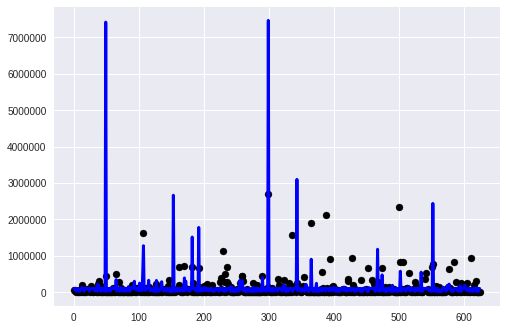

In [0]:
# Plot outputs
myList=[i for i in range(y_test.size)]
plt.scatter(myList,y_test,color='black')
plt.plot(myList,y_pred_clf,color = 'blue',linewidth=3)

*  we have some the predicted values very high compared to actual Y values.
*  This model has performed better than the linear model.

## **Calculating Parameters for GBM model**

Test data Mean Absolute Percent error: 547.3820542027139
Test data Mean Absolute error: 119909.26591415318
Train data Mean Absolute Percent error: 651.1973582859019
Train data Mean Absolute error: 75789.5860040551


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x7f1706fad080>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1706fad8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1706fb7390>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1706fadfd0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1706fad208>,
  <matplotlib.lines.Line2D at 0x7f1706fca710>]}

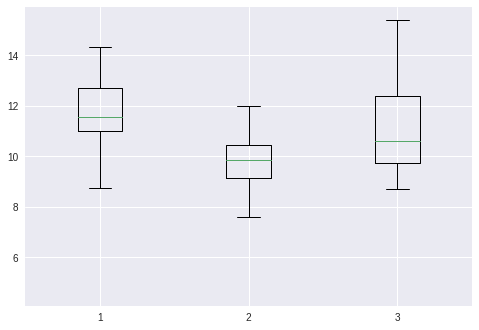

In [0]:
MAPE = np.mean(np.abs((y_test - y_pred_clf) / y_test)) * 100
print("Test data Mean Absolute Percent error: "+ str(MAPE))

MAE = np.mean(np.abs(y_test - y_pred_clf))
print("Test data Mean Absolute error: "+ str(MAE))

results_model.loc[2,'Test_MAPE']=MAPE
results_model.loc[2,'Test_MAE']=MAE

t_pred=clf.predict(x_train.iloc[:,0:13])
#error for training set 
MAPE = np.mean(np.abs((y_train - t_pred) / y_train)) * 100
print("Train data Mean Absolute Percent error: "+ str(MAPE))
results_model.loc[2,'Train_MAPE']=MAPE
MAE = np.mean(np.abs(y_train - t_pred))
print("Train data Mean Absolute error: "+ str(MAE))
results_model.loc[2,'Train_MAE']=MAE

AE = np.abs(y_test - y_pred_clf)
AE_log = np.log(AE)
#plt.boxplot(AE_log)

nf_df = x_test
nf_df['AE']=AE
CA=nf_df[nf_df['STNAME']=='California']['AE']
TX=nf_df[nf_df['STNAME']=='Texas']['AE']
FL=nf_df[nf_df['STNAME']=='Florida']['AE']

data = [np.log(CA),np.log(TX),np.log(FL)]
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)

**Inferences from box plot**

*  even in gbm california has high MAE compared to other two.
*  texas and florida has almost same MAE.

## **Box plot**